# Exploratory Data Analysis
### 1. Benign URL Data 
- Data Type
- Data Shape

### 2. Phishin URL Data
- Data Type
- Data Shape
    
# Feature Engneering (Phishing URL)
- count number of dots 
- count number of delimeters(`;`, `_`, `?`, `=`, `&`)
- ID addr check
- hyphens `_`
- check `@`
- check `//`
- check `/`
- Return the filename extension from url, or `''`
- count number of subdomain
- urlparse

# Feature Importance
- Random Forest Model 이용

-----------------------------------------------------
### 1. Benign Data
- Data Type
- Data Shape

In [23]:
import pandas as pd
import numpy as np
from urllib.parse import urlparse, parse_qs
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

In [2]:
df_benign = pd.read_csv("../input/url_0.csv")
df_benign.tail()

,1,http://www.liquidgeneration.com/,Adult
1048570,1048572,https://www.nucleics.com/peaktrace/,Science
1048571,1048573,http://www.phenosystems.com,Science
1048572,1048574,http://www.thebiolog.com,Science
1048573,1048575,http://code.google.com/p/openbiomind/,Science
1048574,1048576,http://va-genex.sourceforge.net/,Science


In [3]:
list(df_benign['Adult'].unique())

['Adult',
 'Arts',
 'Business',
 'Computers',
 'Games',
 'Health',
 'Home',
 'Kids',
 'News',
 'Recreation',
 'Reference',
 'Science']

In [4]:
df_benign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
1                                   1048575 non-null int64
http://www.liquidgeneration.com/    1048573 non-null object
Adult                               1048575 non-null object
dtypes: int64(1), object(2)
memory usage: 24.0+ MB


In [5]:
df_benign.shape

(1048575, 3)

In [6]:
df_pishing = pd.read_csv("../input/url_1.csv")
df_pishing.tail()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
15256,1095720,https://sites.google.com/site/freehabbocoinsgb...,http://www.phishtank.com/phish_detail.php?phis...,2010-12-30T12:13:46+00:00,yes,2010-12-30T15:29:19+00:00,yes,Sulake Corporation
15257,876840,http://mundovirtualhabbo.blogspot.com/2009_01_...,http://www.phishtank.com/phish_detail.php?phis...,2009-12-03T10:40:26+00:00,yes,2009-12-03T23:56:01+00:00,yes,Sulake Corporation
15258,549159,http://aijcs.blogspot.com/2005/03/colourful-li...,http://www.phishtank.com/phish_detail.php?phis...,2008-11-07T15:04:00+00:00,yes,2011-09-03T19:15:33+00:00,yes,Other
15259,530149,http://tnet.at.ua/index/0-13,http://www.phishtank.com/phish_detail.php?phis...,2008-10-20T09:43:48+00:00,yes,2008-10-21T00:33:18+00:00,yes,Other
15260,524013,http://tudu-free.blogspot.com/2008/02/jogos-ja...,http://www.phishtank.com/phish_detail.php?phis...,2008-10-10T12:16:44+00:00,yes,2008-10-12T09:08:49+00:00,yes,Other


In [7]:
df_pishing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15261 entries, 0 to 15260
Data columns (total 8 columns):
phish_id             15261 non-null int64
url                  15261 non-null object
phish_detail_url     15261 non-null object
submission_time      15261 non-null object
verified             15261 non-null object
verification_time    15261 non-null object
online               15261 non-null object
target               15261 non-null object
dtypes: int64(1), object(7)
memory usage: 953.9+ KB


In [8]:
df_pishing.shape

(15261, 8)

**benign url은 약 1000000개, phisihng url은 15000개로 데이터 불균형이 있다.**

In [58]:
# benign data(45000) + phishing data(15000) = 60000 
df = pd.read_csv('../input/df.csv', index_col=0)
df.reset_index()

,index,url,label
0,428982,http://www.meigaoyi.com,0
1,1038946,http://www.cybertruffle.org.uk/vinales/eng/sch...,0
2,20346,http://prague.tv/funny-pictures-archive/,0
3,869085,http://www.f1autographs.com,0
4,925855,http://members3.boardhost.com/ratterriers/,0
...,...,...,...
59995,14891,http://www.pickleball.global/brentwole/newwire...,1
59996,12426,https://drive.google.com/file/d/1A7vwjAEj1CoCr...,1
59997,2539,http://www.auto-ecole-rennes.com/wp-includes/T...,1
59998,5921,http://coolestspotontheweb.com/wp-content/plug...,1


# Feature Engneering
- url length
- count number of `#`
- count number of `=`
- count number of `/`
- count number of `//`
- count number of `\?`
- count number of `.com`
- count number of `\.`
- count number of dots
- count number of `https://`, `http://`
- count number of `\,`
- check tld
- check subdomain
- count number of delimeters(';', '_', '?', '=', '&')
- hyphens('_')
- check '@'
- check `//`
- check `/`
- Return the filename extension from url, or ''
- count number of subdomain
- urlparse

In [59]:
df['length'] = df.url.str.len()
df['sharp'] = (df.url.str.count('#'))
df['equal'] = (df.url.str.count('='))
df['slash'] = ((df.url.str.count('/')) - 2)
df['dbleslash'] = (df.url.str.count('//')) - 1
df['question'] = (df.url.str.count('\?'))
df['com'] = (df.url.str.count('.com'))
df['dot'] = (df.url.str.count('\.'))
df['protocols'] = (df.url.str.count('https://') + df.url.str.count('http://'))
df['comma'] = (df.url.str.count('\,'))
tld = df.url.str.rpartition('.')[2]
tld = tld.str.replace('\/','')
subdomain = df.url.str.rpartition('.')[0]
subdomain = subdomain.str.rpartition('.')[2].str.replace('http://','').replace('https://','')
df['TLD'] = pd.DataFrame(tld.tolist(), index=df.index)
df['subdomain'] = pd.DataFrame(subdomain.tolist(), index=df.index)

In [60]:
def countdelim(url):
    count = 0
    delim = [';', '_', '?', '=', '&']
    for each in url:
        if each in delim:
            count = count + 1
    return count
    
def isPresentHyphen(url):
    return url.count('-')
    
def isPresentAt(url):
    return url.count('@')

def isPresentDSlash(url):
    return url.count('//')
    
def countSubDir(url):
    return url.count('/')
    
def get_ext(url):    
    root, ext = os.path.splitext(url)
    return ext
    
def countSubDomain(subdomain):
    if not subdomain:
        return 0
    else:
        return len(subdomain.split('.'))
    
df['countdelim'] = df['url'].apply(lambda row: countdelim(row))
df['count_hyphen'] = df['url'].apply(lambda row: isPresentHyphen(row))
df['count_DSlach'] = df['url'].apply(lambda row: isPresentDSlash(row))
df['count_SubDir'] = df['url'].apply(lambda row: countSubDir(row))
df['ext'] = df['url'].apply(lambda row: get_ext(row))
df['count_SubDomain'] = df['ext'].apply(lambda row: countSubDomain(row)) 
df['temp'] = df['url'].apply(lambda url: list(urlparse(url)))
columns = ['scheme', 'netloc', 'path', 'params', 'query', 'fragment']
df[columns] = pd.DataFrame(df.temp.values.tolist(), index=df.index)
df.drop('temp', axis=1, inplace=True)
df.reset_index()

,index,url,label,length,sharp,equal,slash,dbleslash,question,com,...,count_DSlach,count_SubDir,ext,count_SubDomain,scheme,netloc,path,params,query,fragment
0,428982,http://www.meigaoyi.com,0,23,0,0,0,0,0,1,...,1,2,.com,2,http,www.meigaoyi.com,,,,
1,1038946,http://www.cybertruffle.org.uk/vinales/eng/sch...,0,68,0,0,3,0,0,0,...,1,5,.htm,2,http,www.cybertruffle.org.uk,/vinales/eng/schefflera_morototoni.htm,,,
2,20346,http://prague.tv/funny-pictures-archive/,0,40,0,0,2,0,0,0,...,1,4,,0,http,prague.tv,/funny-pictures-archive/,,,
3,869085,http://www.f1autographs.com,0,27,0,0,0,0,0,1,...,1,2,.com,2,http,www.f1autographs.com,,,,
4,925855,http://members3.boardhost.com/ratterriers/,0,42,0,0,2,0,0,1,...,1,4,,0,http,members3.boardhost.com,/ratterriers/,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,14891,http://www.pickleball.global/brentwole/newwire...,1,94,0,0,5,0,0,0,...,1,7,,0,http,www.pickleball.global,/brentwole/newwiresult/garyspeed/6ad6e0f038222...,,,
59996,12426,https://drive.google.com/file/d/1A7vwjAEj1CoCr...,1,82,0,1,4,0,1,1,...,1,6,,0,https,drive.google.com,/file/d/1A7vwjAEj1CoCrJ08YfTU1tU-_crFHPwD/view,,usp=sharing,
59997,2539,http://www.auto-ecole-rennes.com/wp-includes/T...,1,90,0,0,6,0,0,1,...,1,8,,0,http,www.auto-ecole-rennes.com,/wp-includes/Text/Diff/83b3926efe21b0905f3eddd...,,,
59998,5921,http://coolestspotontheweb.com/wp-content/plug...,1,149,0,0,10,0,0,1,...,1,12,,0,http,coolestspotontheweb.com,/wp-content/plugins/ubh/agrement/a78b30fdd6908...,,,


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 428982 to 5667
Data columns (total 26 columns):
url                60000 non-null object
label              60000 non-null int64
length             60000 non-null int64
sharp              60000 non-null int64
equal              60000 non-null int64
slash              60000 non-null int64
dbleslash          60000 non-null int64
question           60000 non-null int64
com                60000 non-null int64
dot                60000 non-null int64
protocols          60000 non-null int64
comma              60000 non-null int64
TLD                60000 non-null object
subdomain          60000 non-null object
countdelim         60000 non-null int64
count_hyphen       60000 non-null int64
count_DSlach       60000 non-null int64
count_SubDir       60000 non-null int64
ext                60000 non-null object
count_SubDomain    60000 non-null int64
scheme             60000 non-null object
netloc             60000 non-null object
p

# Feature Importance
- Random Forest Model 이용

In [62]:
categorical = ['TLD', 'subdomain', 'ext', 'scheme', 'netloc', 'path', 'params', 'query', 'fragment'] 
for f in categorical:
        lbl = preprocessing.LabelEncoder() 
        lbl.fit(df[f])
        df[f] = lbl.transform(df[f])

In [63]:
X = df[['length', 'sharp', 'equal', 'slash', 'dbleslash', 'question', 'com',\
        'dot', 'protocols', 'comma', 'count_hyphen', 'count_DSlach', 'count_SubDir',\
        'count_SubDomain','TLD', 'subdomain', 'ext', 'scheme', 'netloc', 'path', 'params', 'query', 'fragment'
       ]]
y = df['label']

model = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=0).fit(X,y)

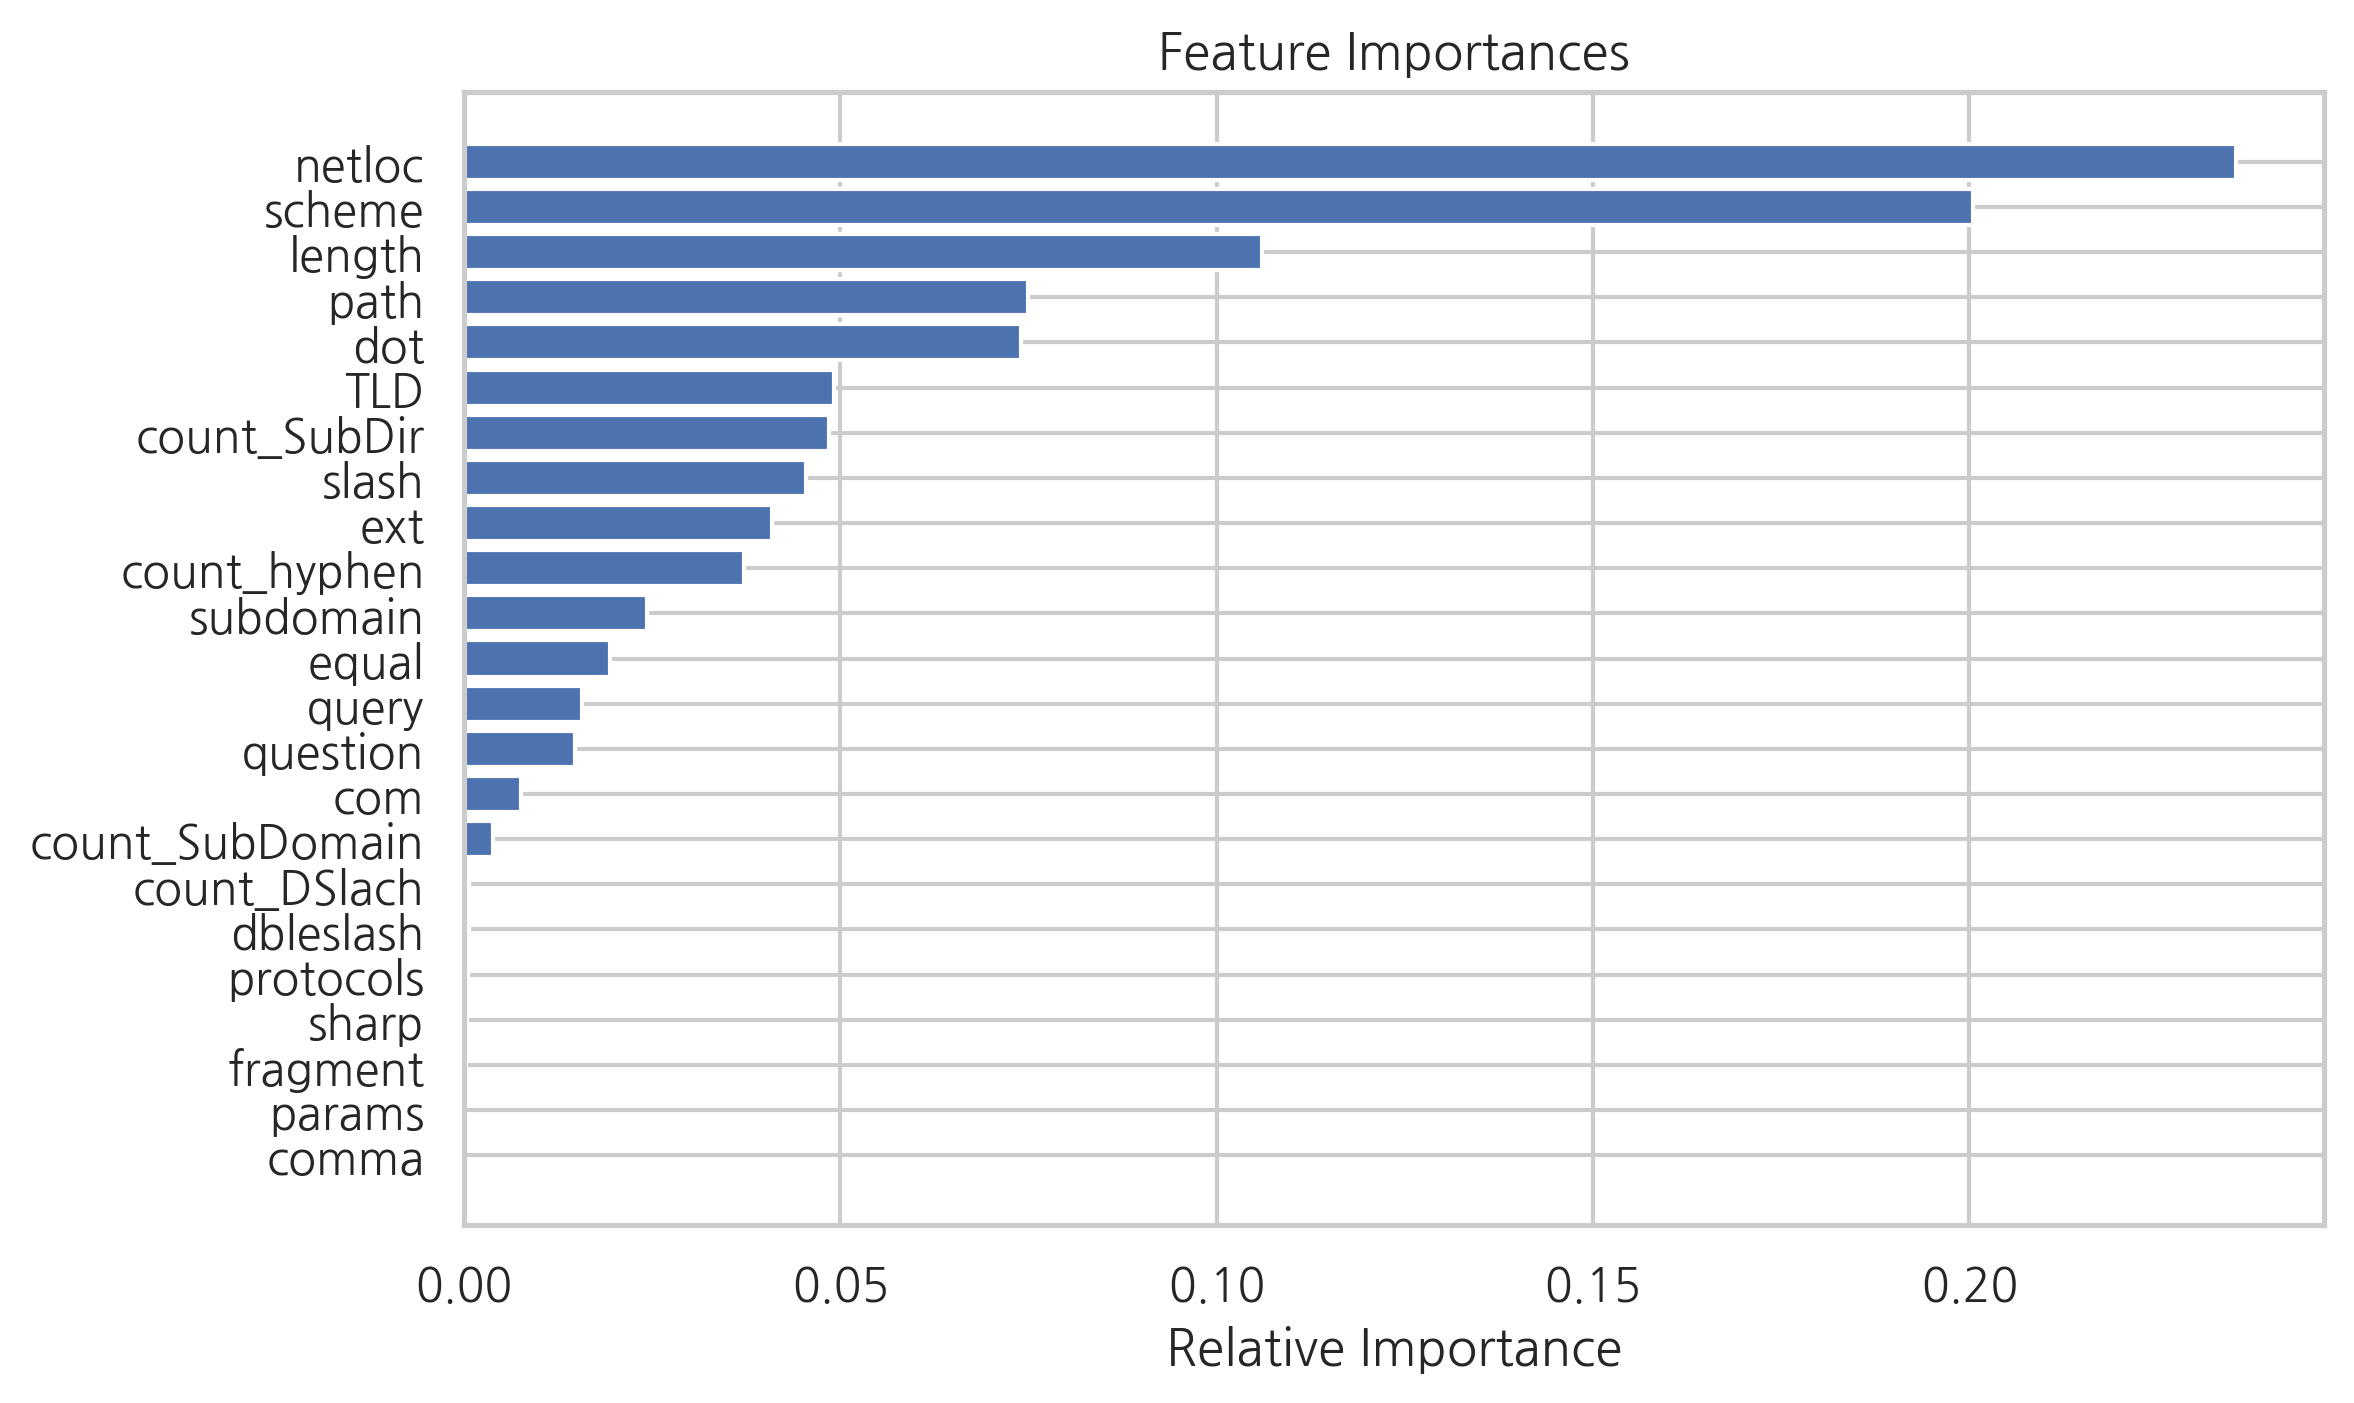

In [64]:
feature_names = ['length', 'sharp', 'equal', 'slash', 'dbleslash', 'question', 'com',\
                 'dot', 'protocols', 'comma', 'count_hyphen', 'count_DSlach', 'count_SubDir',\
                 'count_SubDomain','TLD', 'subdomain', 'ext', 'scheme', 'netloc', 'path', 'params', 'query', 'fragment']
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()